<a href="https://colab.research.google.com/github/inschools-ng/MitsLinReg2/blob/main/Homework_1_Number_3_and_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Boston data set from sklearn library.

from sklearn.datasets

import load_boston

boston = load_boston()

We will now try to predict per capita crime rate using the other variables in this data set.


In other words, per capita crime rate is the response, and the other variables are the
predictors.


a) For each predictor, fit a simple linear regression model to predict the response.


Describe
your results. In which of the models is there a statistically significant association
between the predictor and the response? Create some plots to back up your assertions.
b) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H0 : βj =
0?
c) How do your results from (a) compare to your results from (b)?
Create a plot displaying the univariate regression coefficients from (a) on the x -axis,
and the multiple regression coefficients from (b) on the y -axis. That is, each predictor
is displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x -axis, and its coefficient estimate in the multiple linear
regression model is shown on the y -axis.
d) Is there evidence of non-linear association between any of the predictors and the
response? To answer this question, for each predictor X , fit a model of the form
𝑌 = 𝛽0 + 𝛽1𝑋 + 𝛽2𝑋2 + 𝛽3𝑋3 + 𝜀
Attribute Information (in order):
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np # for data manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualisation
from pylab import rcParams


import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2


The BikeShare dataset has been uploaded to a Github Account.

This notebook will be cloning and reading the files directly from the Github repository.

In [2]:
!git clone "https://github.com/inschools-ng/MitsLinReg2.git"

Cloning into 'MitsLinReg2'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (31/31), 2.85 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
df = pd.read_csv("/content/MitsLinReg2/Boston.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)

In [4]:
print('\n', df.head())
print('\n', df.tail())


       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

         crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.

In [5]:
print('\nNumber of rows and Columns in the data set: ', df.shape)


Number of rows and Columns in the data set:  (506, 14)


In [6]:
print(df.describe())


             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

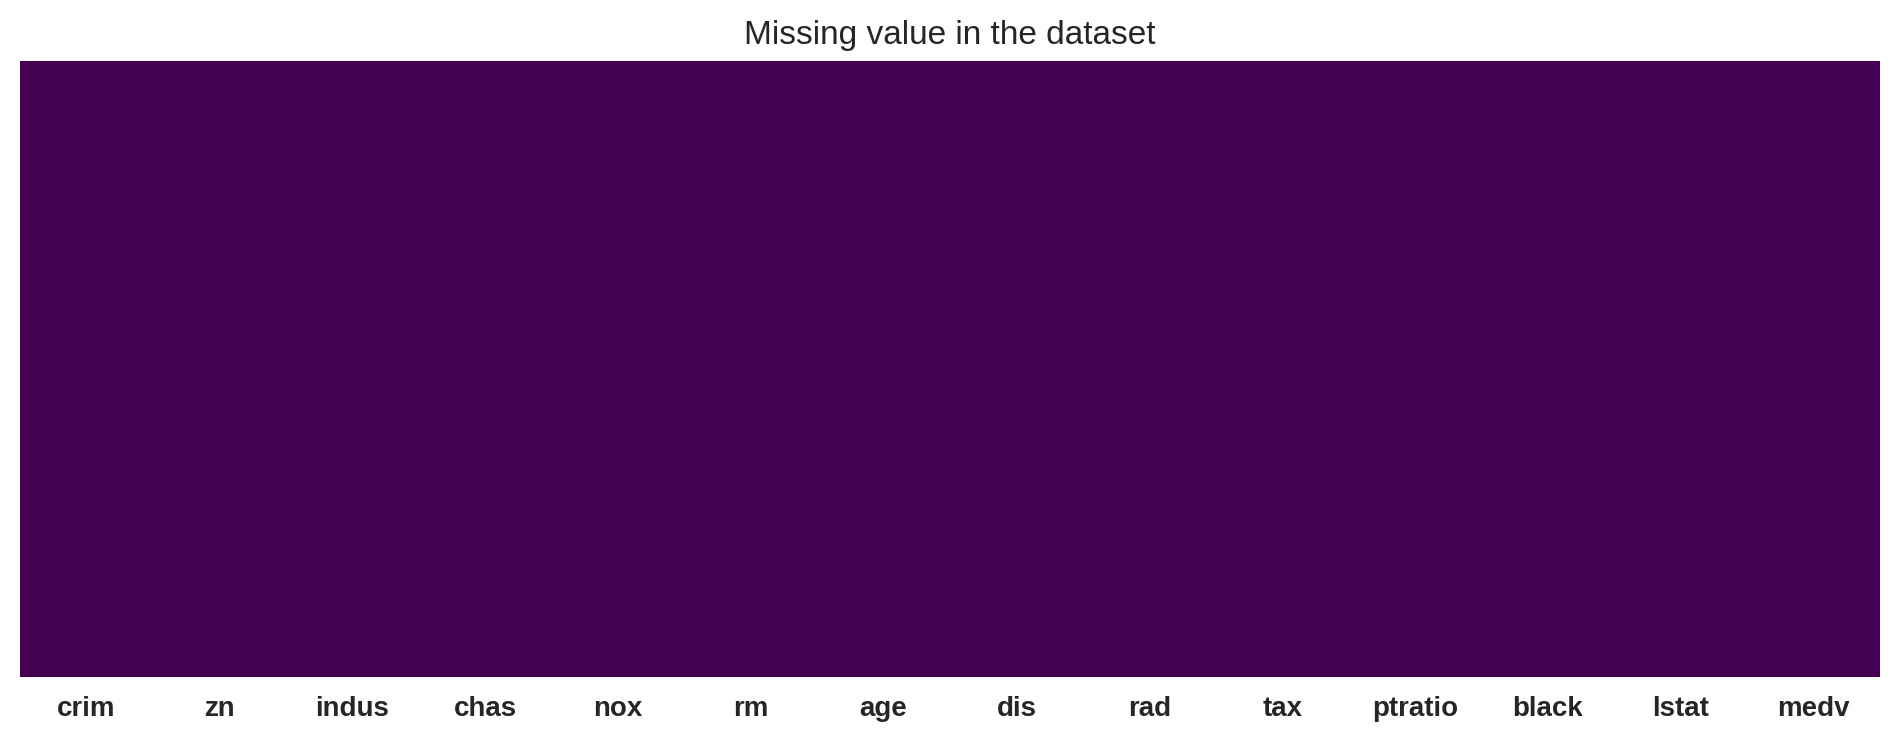

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There are no missing/unavailable value in the dataset

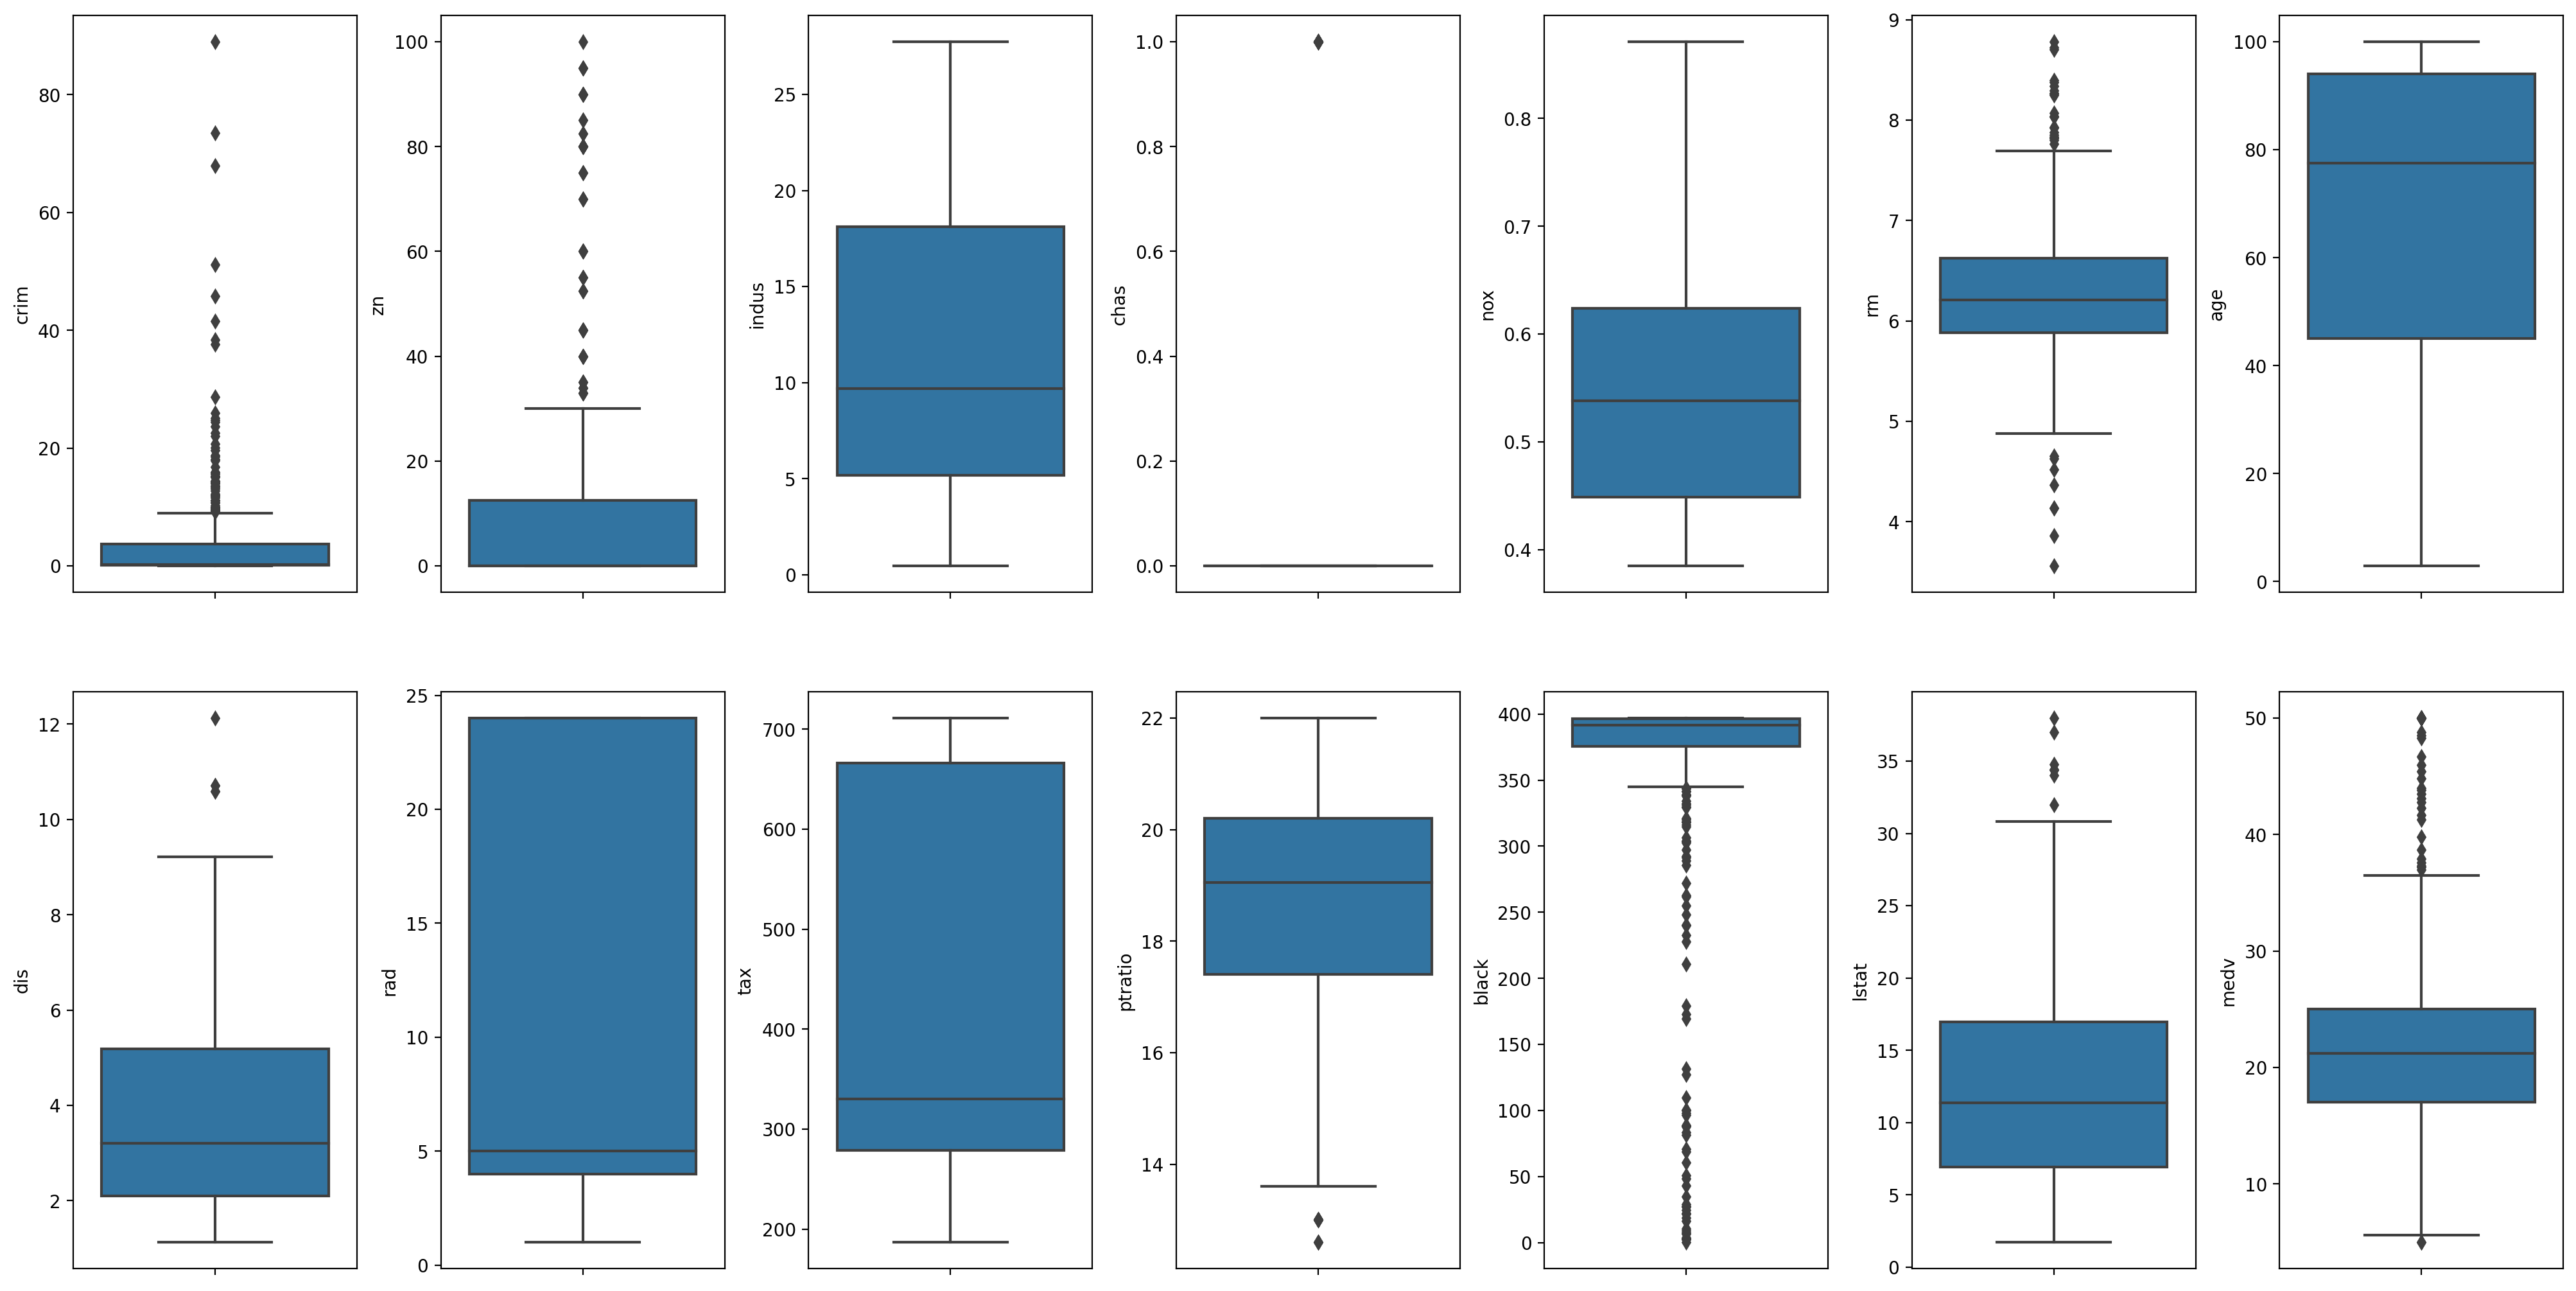

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

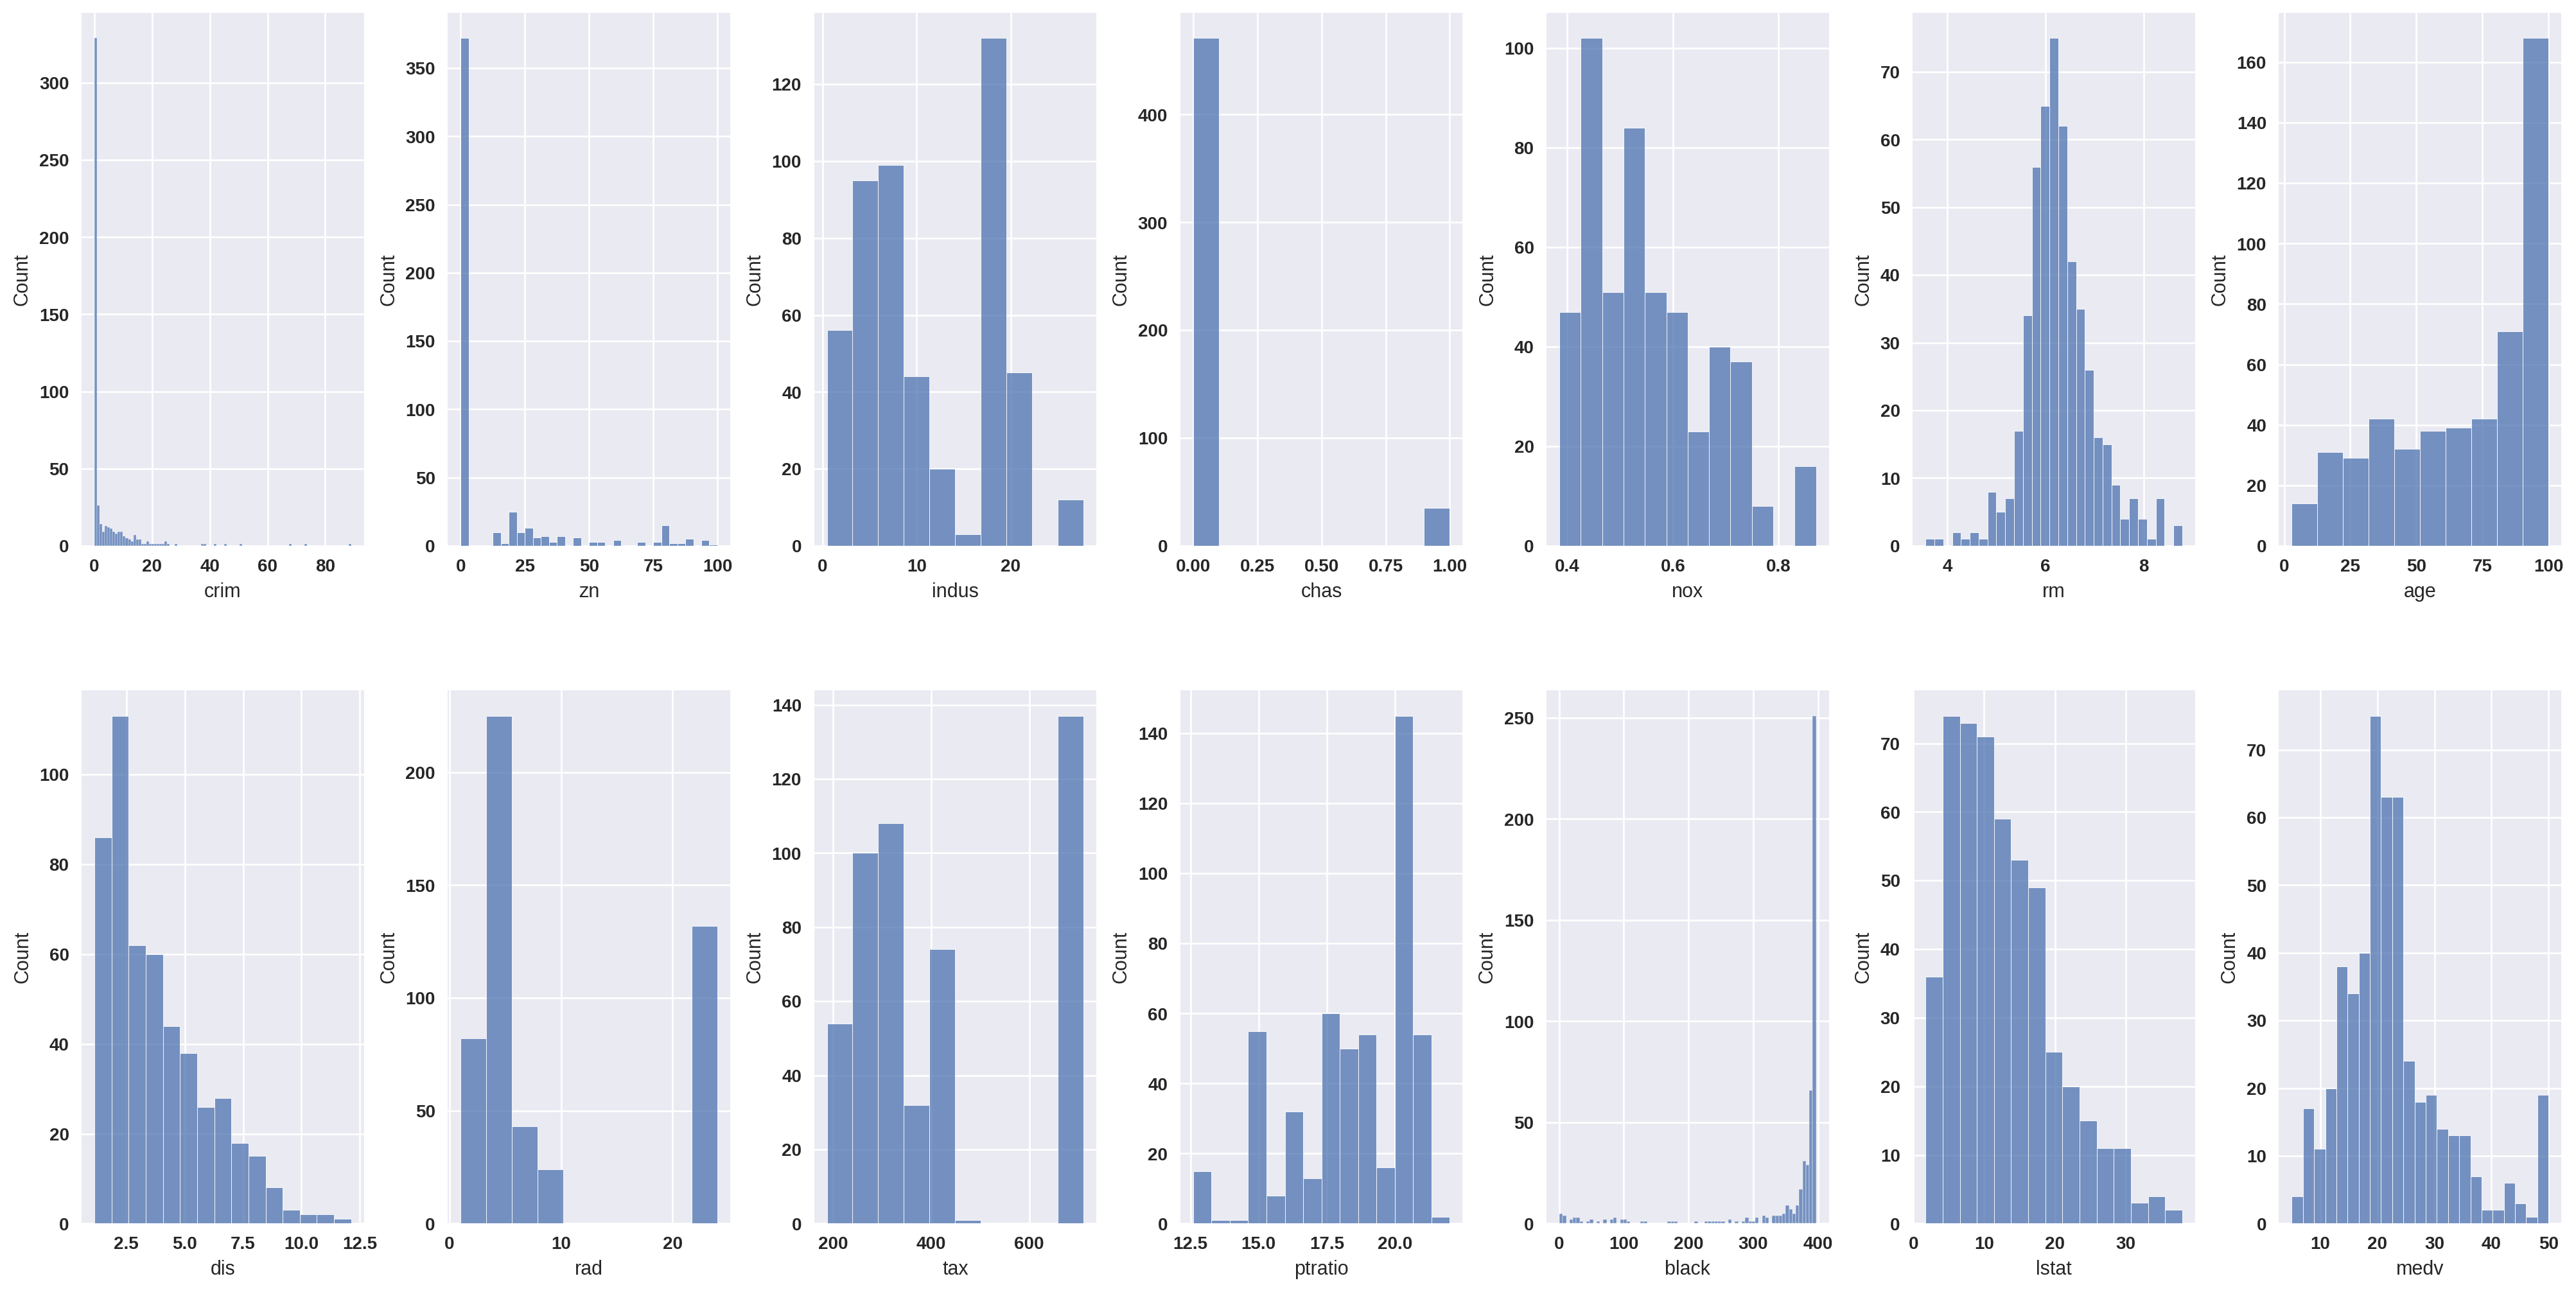

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.histplot(value, ax=ax[index])
  index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<Axes: >

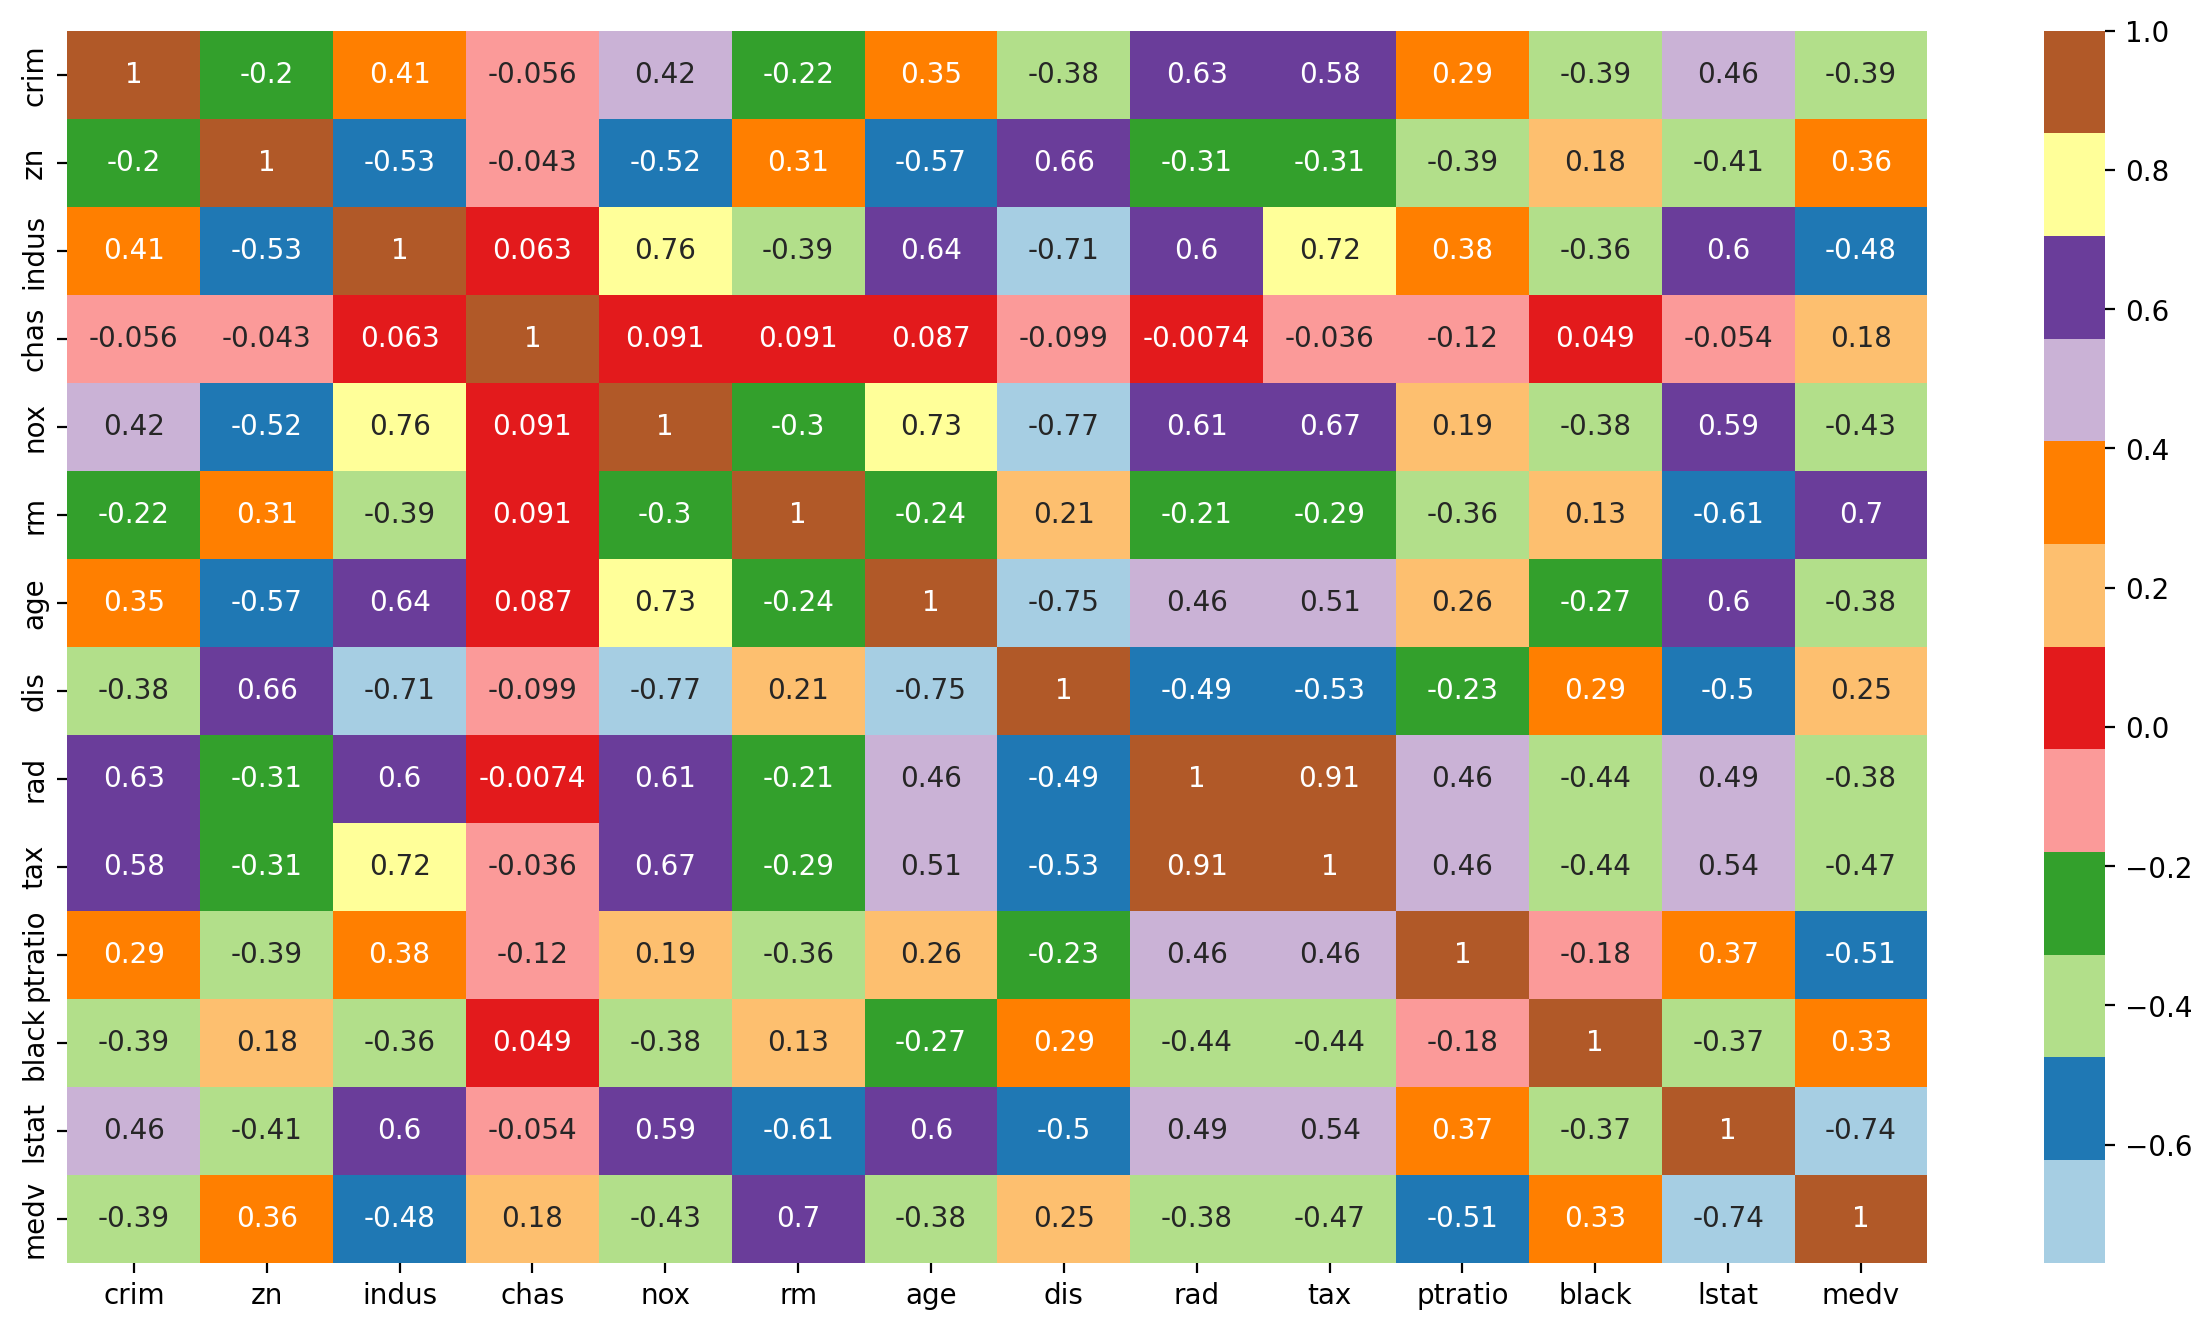

In [ ]:
# Correltion mtrix
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap='Paired')


Question 3a
# We have h(x) = B0(0) + B1(zn) + B2(indus) + B3(chas) + B4(nox) + B5(rm) +B6(age) + B7(dis) + B8(rad) + B9(tax) +B10(pratio) + B11(black) + B12(lstat) + B13(medv)

In [8]:
# Splitting of the input data
X_1 = df[['zn']]
X_2 = df[['indus']]
X_3 = df[['chas']]
X_4 = df[['nox']]
X_5 = df[['rm']]
X_6 = df[['age']]
X_7 = df[['dis']]
X_8 = df[['rad']]
X_9 = df[['tax']]
X_10 = df[['ptratio']]
X_11 = df[['black']]
X_12 = df[['lstat']]
X_13 = df[['medv']]
X = df.drop(columns=['crim'], axis=1)
y = df[['crim']]



In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# split the input data set to training and testing data sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20)
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.3, random_state=20)
X_2_train, X_2_test, y_train, y_test = train_test_split(X_2, y, test_size = 0.3, random_state=20)
X_3_train, X_3_test, y_train, y_test = train_test_split(X_3, y, test_size = 0.3, random_state=20)
X_4_train, X_4_test, y_train, y_test = train_test_split(X_4, y, test_size = 0.3, random_state=20)
X_5_train, X_5_test, y_train, y_test = train_test_split(X_5, y, test_size = 0.3, random_state=20)
X_6_train, X_6_test, y_train, y_test = train_test_split(X_6, y, test_size = 0.3, random_state=20)
X_7_train, X_7_test, y_train, y_test = train_test_split(X_7, y, test_size = 0.3, random_state=20)
X_8_train, X_8_test, y_train, y_test = train_test_split(X_8, y, test_size = 0.3, random_state=20)
X_9_train, X_9_test, y_train, y_test = train_test_split(X_9, y, test_size = 0.3, random_state=20)
X_10_train, X_10_test, y_train, y_test = train_test_split(X_10, y, test_size = 0.3, random_state=20)
X_11_train, X_11_test, y_train, y_test = train_test_split(X_11, y, test_size = 0.3, random_state=20)
X_12_train, X_12_test, y_train, y_test = train_test_split(X_12, y, test_size = 0.3, random_state=20)
X_13_train, X_13_test, y_train, y_test = train_test_split(X_13, y, test_size = 0.3, random_state=20)


In [12]:
# Create the linear regression model with an intercept
model = LinearRegression(fit_intercept=True)
model_1 = LinearRegression(fit_intercept=True)
model_2 = LinearRegression(fit_intercept=True)
model_3 = LinearRegression(fit_intercept=True)
model_4 = LinearRegression(fit_intercept=True)
model_5 = LinearRegression(fit_intercept=True)
model_6 = LinearRegression(fit_intercept=True)
model_7 = LinearRegression(fit_intercept=True)
model_8 = LinearRegression(fit_intercept=True)
model_9 = LinearRegression(fit_intercept=True)
model_10 = LinearRegression(fit_intercept=True)
model_11 = LinearRegression(fit_intercept=True)
model_12 = LinearRegression(fit_intercept=True)
model_13 = LinearRegression(fit_intercept=True)

# Fit the model to the data
model_multi_rgn = model.fit(X_train, y_train)
zn_model_1 = model_1.fit(X_1_train, y_train)
indus_model_2 = model_2.fit(X_2_train, y_train)
chas_model_3 = model_3.fit(X_3_train, y_train)
nox_model_4 = model_4.fit(X_4_train, y_train)
rm_model_5 = model_5.fit(X_5_train, y_train)
age_model_6 = model_6.fit(X_6_train, y_train)
dis_model_7 = model_7.fit(X_7_train, y_train)
rad_model_8 = model_8.fit(X_8_train, y_train)
tax_model_9 = model_9.fit(X_9_train, y_train)
ptratio_model_10 = model_10.fit(X_10_train, y_train)
black_model_11 = model_11.fit(X_11_train, y_train)
lstat_model_12 = model_12.fit(X_12_train, y_train)
medv_model_13 = model_13.fit(X_13_train, y_train)


print('\nThe multivariate regression model coefficients are:  ', model_multi_rgn.coef_ )
print('\nThe multivariate regression model intercept is:  ', model_multi_rgn.intercept_)
print('\nThe simple regression model coefficient and intercept for zn:  ', zn_model_1.coef_, zn_model_1.intercept_)
print('\nThe simple regression model coefficient and intercept for indus:  ', indus_model_2.coef_, indus_model_2.intercept_)
print('\nThe simple regression model coefficient and intercept for chas:  ', chas_model_3.coef_, chas_model_3.intercept_)
print('\nThe simple regression model coefficient and intercept for nox:  ', nox_model_4.coef_, nox_model_4.intercept_)
print('\nThe simple regression model coefficient and intercept for rm:  ', rm_model_5.coef_, nox_model_4.intercept_)
print('\nThe simple regression model coefficient and intercept for age:  ', age_model_6.coef_, age_model_6.intercept_)
print('\nThe simple regression model coefficient and intercept for dis:  ', dis_model_7.coef_, dis_model_7.intercept_)
print('\nThe simple regression model coefficient and intercept for rad:  ', rad_model_8.coef_, rad_model_8.intercept_)
print('\nThe simple regression model coefficient and intercept for tax:  ', tax_model_9.coef_, tax_model_9.intercept_)
print('\nThe simple regression model coefficient and intercept for ptratio:  ', ptratio_model_10.coef_, ptratio_model_10.intercept_)
print('\nThe simple regression model coefficient and intercept for black:  ', black_model_11.coef_, black_model_11.intercept_)
print('\nThe simple regression model coefficient and intercept for lstat:  ', lstat_model_12.coef_, lstat_model_12.intercept_)
print('\nThe simple regression model coefficient and intercept for medv:  ', medv_model_13.coef_, medv_model_13.intercept_)




The multivariate regression model coefficients are:   [[ 3.59661444e-02 -7.99315370e-02 -5.99658878e-01 -6.97460059e+00
  -6.20384727e-01  4.78570587e-03 -7.54483189e-01  5.44138717e-01
  -2.51782800e-03 -1.85423792e-01 -9.64498681e-03  1.40155788e-01
  -7.93649634e-02]]

The multivariate regression model intercept is:   [17.05332363]

The simple regression model coefficient and intercept for zn:   [[-0.07322607]] [4.29046082]

The simple regression model coefficient and intercept for indus:   [[0.45131572]] [-1.66562763]

The simple regression model coefficient and intercept for chas:   [[-2.00394989]] [3.57214174]

The simple regression model coefficient and intercept for nox:   [[29.40815074]] [-12.80875084]

The simple regression model coefficient and intercept for rm:   [[-3.25040971]] [-12.80875084]

The simple regression model coefficient and intercept for age:   [[0.09624105]] [-3.07743508]

The simple regression model coefficient and intercept for dis:   [[-1.44719183]] [8.93

In [13]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#model prediction for multivariate and simple regression models
y_pred_multivariate = model.predict(X_train)
y_pred_zn = model_1.predict(X_1_train)
y_pred_indus = model_2.predict(X_2_train)
y_pred_chas = model_3.predict(X_3_train)
y_pred_nox = model_4.predict(X_4_train)
y_pred_rm = model_5.predict(X_5_train)
y_pred_age = model_6.predict(X_6_train)
y_pred_dis = model_7.predict(X_7_train)
y_pred_rad = model_8.predict(X_8_train)
y_pred_tax = model_9.predict(X_9_train)
y_pred_ptratio = model_10.predict(X_10_train)
y_pred_black = model_11.predict(X_11_train)
y_pred_lstat = model_12.predict(X_12_train)
y_pred_medv = model_13.predict(X_13_train)



In [ ]:
# Model Evaluation

print('R^2:',metrics.r2_score(y_train, y_pred_multivariate))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_multivariate))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_multivariate))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_multivariate))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_multivariate)))



R^2: 0.5315218092745225
Adjusted R^2: 0.5136094078644308
MAE: 2.5475198832542167
MSE: 27.14573167777247
RMSE: 5.210156588603885


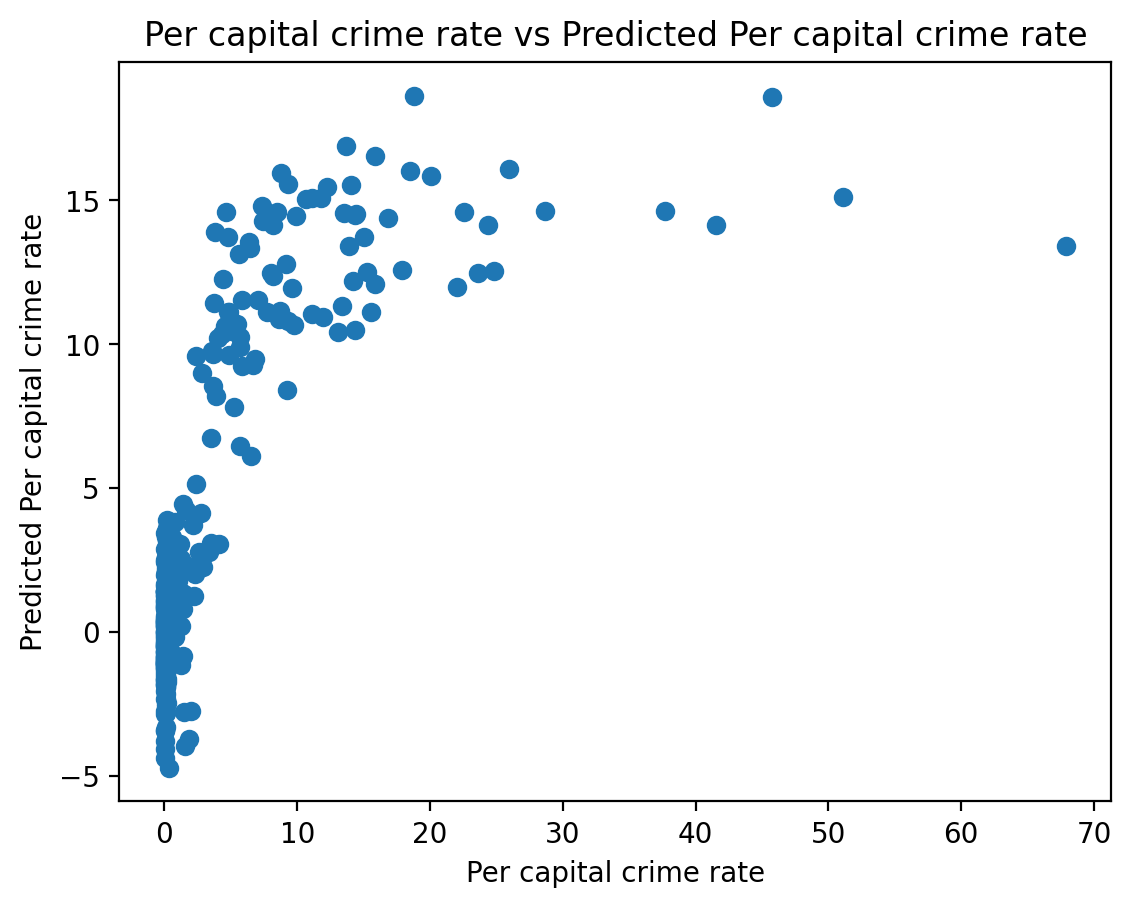

In [ ]:
# Plot of actual vs predicted variables of the multivariate regression model
plt.scatter(y_train, y_pred_multivariate)
plt.xlabel("Per capital crime rate")
plt.ylabel("Predicted Per capital crime rate")
plt.title("Per capital crime rate vs Predicted Per capital crime rate")
plt.show()

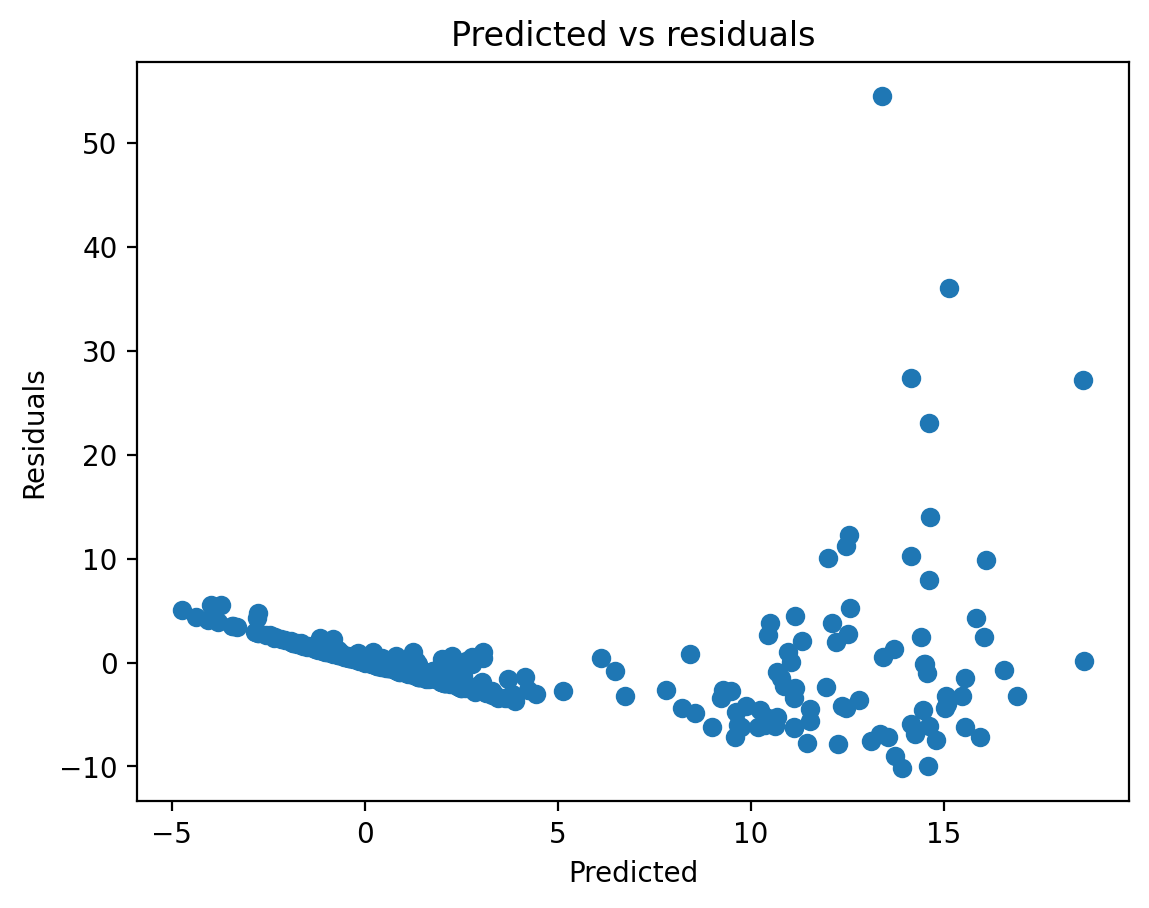

In [ ]:
# Checking residuals
plt.scatter(y_pred_multivariate,y_train-y_pred_multivariate)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

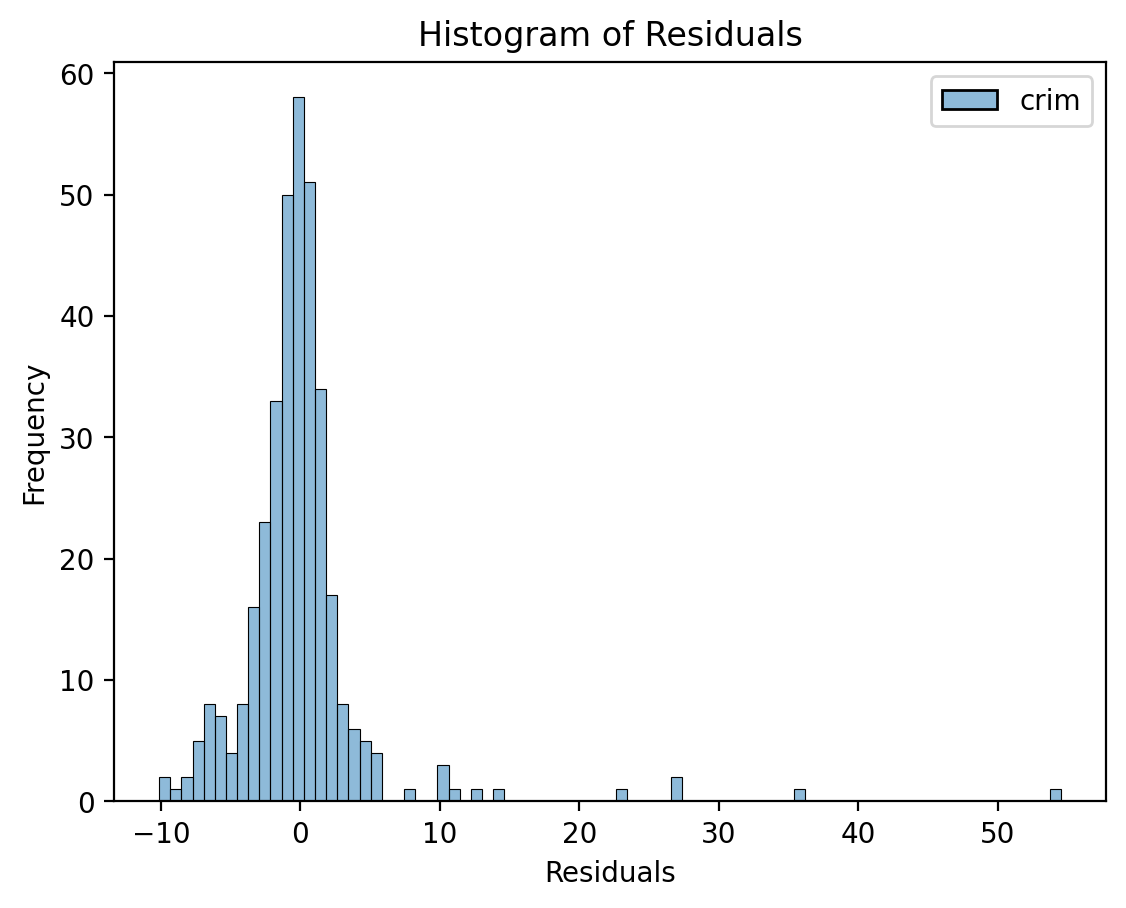

In [ ]:
# Checking Normality of errors
sns.histplot(y_train-y_pred_multivariate)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Predicting Test data with the model
y_multivariate_test_pred = model.predict(X_test)

In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_multivariate_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_multivariate_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_multivariate_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_multivariate_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_multivariate_test_pred)))

R^2: 0.3429532580206791
Adjusted R^2: 0.281057550442917
MAE: 2.940706243087375
MSE: 72.64868976881046
RMSE: 8.523420074642013


 Question 4



 Using the Boston data set, fit classification models in order to predict whether a given
suburb has a crime rate above or below the median. Explore logistic regression using
various subsets of the predictors. Describe your findings using a testing accuracy


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

median_crime_rate = df['crim'].median()
print(median_crime_rate)
df['medcrim'] = (df['crim'] > median_crime_rate).astype(int)

print('\n', df.head())
print('\n', df.tail())

0.25651

       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  medcrim  
0  396.90   4.98  24.0        0  
1  396.90   9.14  21.6        0  
2  392.83   4.03  34.7        0  
3  394.63   2.94  33.4        0  
4  396.90   5.33  36.2        0  

         crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675  

In [24]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, df['medcrim'], test_size = 0.3, random_state=20)
logistic_model = LogisticRegression(max_iter=100000)
logistic_model.fit(X_train, y_train_log)

LogisticRegression(max_iter=100000)

In [28]:
y_pred_log = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test_log, y_pred_log)
print('Model 1 Accuracy:', accuracy)

Model 1 Accuracy: 0.8026315789473685


In [15]:
X_8_train, X_8_test, y_train_log, y_test_log = train_test_split(X_8, df['medcrim'], test_size = 0.3, random_state=20)

logistic_model_rad = LogisticRegression()
logistic_model_rad.fit(X_8_train, y_train_log)


LogisticRegression()

In [18]:
y_pred_log_1 = logistic_model_rad.predict(X_8_test)
accuracy_1 = accuracy_score(y_test_log, y_pred_log_1)
print('Model 1 Accuracy:', accuracy_1)